#EDA: Exploratory and descriptive analysis (análisis exploratorio descriptivo)

## ÍNDICE

1. [Dataset](#1.-Dataset)
2. [Univariate visualization](#2.-Univariate-visualization)
    * 2.1 [Quantitative features](#2.1-Quantitative-features)
    * 2.2 [Categorical and binary features](#2.2-Categorical-and-binary-features)
3. [Multivariate visualization](#3.-Multivariate-visualization)
    * 3.1 [Quantitative vs. Quantitative](#3.1-Quantitative-vs.-Quantitative)
    * 3.2 [Quantitative vs. Categorical](#3.2-Quantitative-vs.-Categorical)
    * 3.3 [Categorical vs. Categorical](#3.3-Categorical-vs.-Categorical)
4. [Whole dataset visualizations](#4.-Whole-dataset-visualizations)
    * 4.1 [Naive approach](#4.1-A-naive-approach)
    * 4.2 [Dimensionality reduction](#4.2-Dimensionality-reduction)
    * 4.3 [t-SNE](#4.3-t-SNE)
5. [Demo assignment](#6.-Demo-assignment)
6. [Useful resources](#6.-Useful-resources)

## 1. Dataset

In [0]:
import numpy as np 
import pandas as pd

# Matplotlib forms basis for visualization in Python
import matplotlib.pyplot as plt

# We will use the Seaborn library
import seaborn as sns
sns.set()

# Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg'

In [4]:
##### DOWNLOAD DATASET. ONLY IN COLAB !!!
!wget -P ./../data/ https://raw.githubusercontent.com/CenticMurcia/curso-ciencia-datos/master/data/telecom_churn.csv

--2020-02-04 22:05:56--  https://raw.githubusercontent.com/CenticMurcia/curso-ciencia-datos/master/data/telecom_churn.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 279997 (273K) [text/plain]
Saving to: ‘./../data/telecom_churn.csv’

telecom_churn.csv   100%[===================>] 273.43K  --.-KB/s    in 0.05s   

2020-02-04 22:05:56 (5.29 MB/s) - ‘./../data/telecom_churn.csv’ saved [279997/279997]



In [0]:
df = pd.read_csv('../data/telecom_churn.csv')

In [6]:
df.head(3)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
State                     3333 non-null object
Account length            3333 non-null int64
Area code                 3333 non-null object
International plan        3333 non-null object
Voice mail plan           3333 non-null object
Number vmail messages     3333 non-null int64
Total day minutes         3333 non-null float64
Total day calls           3333 non-null int64
Total day charge          3333 non-null float64
Total eve minutes         3333 non-null float64
Total eve calls           3333 non-null int64
Total eve charge          3333 non-null float64
Total night minutes       3333 non-null float64
Total night calls         3333 non-null int64
Total night charge        3333 non-null float64
Total intl minutes        3333 non-null float64
Total intl calls          3333 non-null int64
Total intl charge         3333 non-null float64
Customer service calls    3333 non-null int64

|  Name  | Description | Value Type | Statistical Type |
|---         |---       |---     |---
| **State** | State abbreviation (like KS = Kansas) | String | Categorical |
| **Account length** | How long the client has been with the company | Numerical | Quantitative |
| **Area code** | Phone number prefix | Numerical | Categorical |
| **International plan** | International plan (on/off) | String, "Yes"/"No" | Categorical/Binary |
| **Voice mail plan** | Voicemail (on/off) | String, "Yes"/"No" | Categorical/Binary |
| **Number vmail messages** | Number of voicemail messages | Numerical | Quantitative |
| **Total day minutes** |  Total duration of daytime calls | Numerical | Quantitative |
| **Total day calls** | Total number of daytime calls  | Numerical | Quantitative |
| **Total day charge** | Total charge for daytime services | Numerical | Quantitative |
| **Total eve minutes** | Total duration of evening calls | Numerical | Quantitative |
| **Total eve calls** | Total number of evening calls | Numerical | Quantitative |
| **Total eve charge** | Total charge for evening services | Numerical | Quantitative |
| **Total night minutes** | Total duration of nighttime calls | Numerical | Quantitative |
| **Total night calls** | Total number of nighttime calls | Numerical | Quantitative |
| **Total night charge** | Total charge for nighttime services | Numerical | Quantitative |
| **Total intl minutes** | Total duration of international calls  | Numerical | Quantitative |
| **Total intl calls** | Total number of international calls | Numerical | Quantitative |
| **Total intl charge** | Total charge for international calls | Numerical | Quantitative |
| **Customer service calls** | Number of calls to customer service | Numerical | Categorical/Ordinal |

In [0]:
# Convertimos 'Area code' en categórica

df['Area code'] = df['Area code'].astype(object)

In [11]:
df.describe()

,Account length,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [12]:
df.describe(include=['object', 'bool'])

,State,Area code,International plan,Voice mail plan,Churn
count,3333,3333,3333,3333,3333
unique,51,3,2,2,2
top,WV,415,No,No,False
freq,106,1655,3010,2411,2850


### 2. Visualización univariante (Univariate visualization)
## 2.1 Caracteristicas cuantitativas (Quantitative features)
## Histogramas y gráficas de densidad (Histograms and density plots)

In [43]:
# Total day minutes: duración total de las llamadas de día.
# Total intl calls: número total de llamadas internacionales.

features = ['Total day minutes', 'Total intl calls'];
df[features].describe()

,Total day minutes,Total intl calls
count,3333.000000,3333.000000
mean,179.775098,4.479448
std,54.467389,2.461214
min,0.000000,0.000000
25%,143.700000,3.000000
50%,179.400000,4.000000
75%,216.400000,6.000000
max,350.800000,20.000000


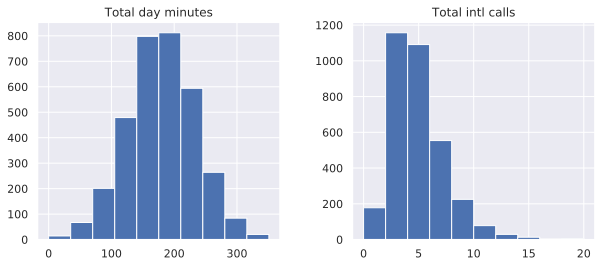

In [44]:
df[features].hist(figsize=(10, 4));

# DataFrame.hist(): representación de la distribución del dato. La función invoca matplotlib.pyplot.hist() para cada serie en el DataFrame, resultando 
# un histograma por columna.
# gráfica 1: La mayoría de los clientes hablan entre 150-200 minutos. El histograma está bien distribuido y su moda y mediana son parecidas.
# gráfica 2: La mayoría de los cliente realizan entre 3 y 4 llamadas internacionales.

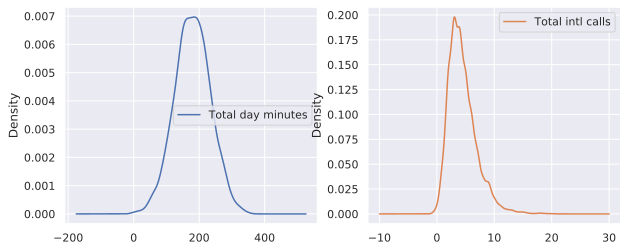

In [45]:
df[features].plot(kind='density', subplots=True, layout=(1, 2), sharex=False, figsize=(10, 4));
#   DataFrame.plot(): Make plots of Series or DataFrame
#   kind='density': kernel density estimation (KDE), forma de estimar la densidad de una variable aleatoria.
#   subplot=True: una subgráfica para cada serie del dataframe
#   sharex=False: si se comparten los valores del eje x
#   figsize=(x,y): tupla (anchura, altura) en pulgadas

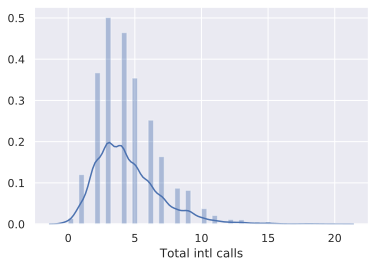

In [46]:
# seaborn.displot(): Flexibly plot a univariate distribution of observations. Combina histograma matplotlib.hist() con seaborn.kdeplot() y 
# seaborn.rugplot()

sns.distplot(df['Total intl calls']);

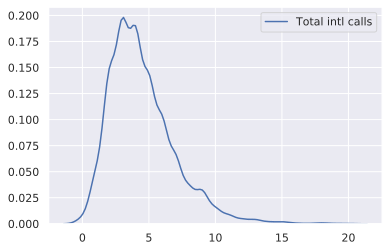

In [47]:
sns.kdeplot(df['Total intl calls'])

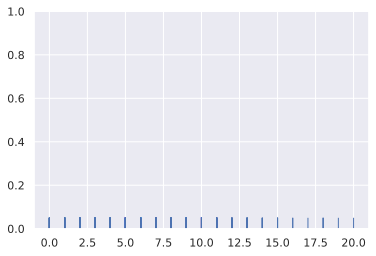

In [48]:
sns.rugplot(df['Total intl calls'])

In [49]:
df['Total intl calls'].describe()

count    3333.000000
mean        4.479448
std         2.461214
min         0.000000
25%         3.000000
50%         4.000000
75%         6.000000
max        20.000000
Name: Total intl calls, dtype: float64

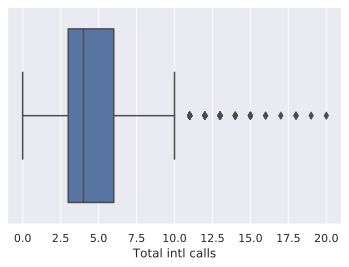

In [50]:
sns.boxplot(x='Total intl calls', data=df, orient='h')

In [51]:
# La mediana está en 4, y el ancho de la caja nos indica que entre el 25% y el 75% se concentra entre 3 y 6 llamadas internacionales por cliente, 
# donde el 25%-50% está mas concentrado que el 50-75%.
# Se presentan varios valores atípicos a partir de Q3 + (1.5 * Rango intercuartilico). 
# Valores atípicos = outliers

Q1 = df['Total intl calls'].quantile(0.25);
Q3 = df['Total intl calls'].quantile(0.75);
IQR = Q3 - Q1;
limiteSuperior = Q3 + 1.5 * IQR
print(limiteSuperior)

10.5


In [52]:
# Tenemos 78 personas cuyas llamadas internacionales pertenecen a valores atipicos, es decir, han realizado mas de 10.5 llamadas internacionales.
df[df['Total intl calls'] > limiteSuperior].shape

(78, 20)

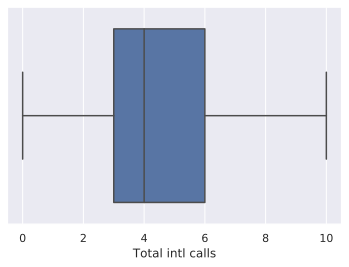

In [58]:
dfSinAtipicos = df[df['Total intl calls'] < limiteSuperior]
sns.boxplot(x = 'Total intl calls', data = dfSinAtipicos, orient = 'h')

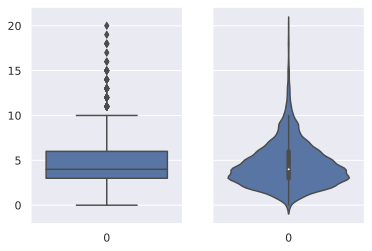

In [53]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(6, 4))

sns.boxplot(data=df['Total intl calls'], ax=axes[0])
sns.violinplot(data=df['Total intl calls'], ax=axes[1])

# Un violinplot es similar a un boxplot, con un KDE a cada lado. kernel density estimation (KDE), forma de estimar la densidad de una variable 
# aleatoria.
# El punto blanco es la mediana, y la barra interna marca el rango IQR.
# Es mas informativo que un boxplot, mientras que un boxplot solo muestra estadísticas resumidas como la media/mediana y los rangos intercuartiles,
# el violinplot muestra la distribución completa de los datos
# La diferencia es particularmente útil cuando la distribución de datos es multimodal (más de un pico). En este caso, un violinplot muestra la 
# presencia de diferentes picos, su posición y amplitud relativa.

## 2.2 Características categóricas y binarias (Categorical and binary features)
## Tabla de frecuencia


In [18]:
df['Churn'].value_counts()

False    2850
True      483
Name: Churn, dtype: int64

In [35]:
df['Total intl calls'].value_counts()

3     668
4     619
2     489
5     472
6     336
7     218
1     160
8     116
9     109
10     50
11     28
0      18
12     15
13     14
15      7
14      6
18      3
16      2
19      1
17      1
20      1
Name: Total intl calls, dtype: int64

## Gráfica de barras

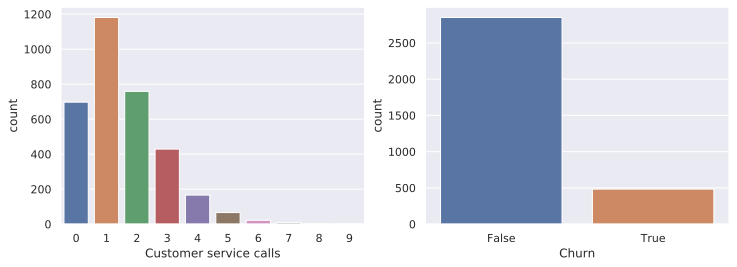

In [37]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
sns.countplot(x='Customer service calls', data=df, ax=axes[0])
sns.countplot(x='Churn', data=df, ax=axes[1])

## 3. Visualización multivariante (Multivariate visualization)

## 3.1 Cuantitativa vs Cuantitativa (Quantitative vs. Quantitative)

## Matriz de correlación (Correlation matrix)

In [38]:
df.head(2)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Customer service calls CAT
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.7,1,False,1
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False,1


In [0]:
# Nos quedamos solo con las variables numéricas.
numerical = list(set(df.columns) - set(['State', 'International plan', 'Voice mail plan', 'Area code', 'Churn', 'Customer service calls']))
numerical

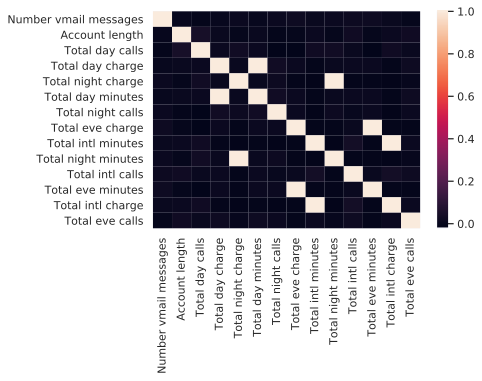

In [63]:
# Correlación de columnas por parejas
# El modelo mide y muestra la interdependencia en relaciones asociadas o entre cada pareja de variables y todas al mismo tiempo.
corr_matrix = df[numerical].corr()
sns.heatmap(corr_matrix)

# Vemos varias correlaciones bajo la diagonal (sobre la diagonal tenemos las mismas), pero al revisarlas en detale vemos que son obvias:
#   Total day minutes y Total day charge
#   Total night minutes y Total night charge
#   Total eve minutes y Total eve charge
#   Total intl charge y Total intl minutes
# donde los minutos hablados están correlacionados con el total cobrado.

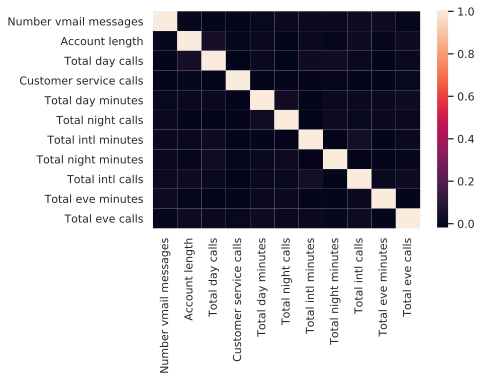

In [86]:
# Quitamos las cuantitativas que tienen correlación vistas en el análisis anterior y vemos que la matriz no muestra nada interesante.
numerical = list(set(numerical) - set(['Total day charge', 'Total eve charge', 'Total night charge', 'Total intl charge']))
corr_matrix = df[numerical].corr()
sns.heatmap(corr_matrix)

350.8


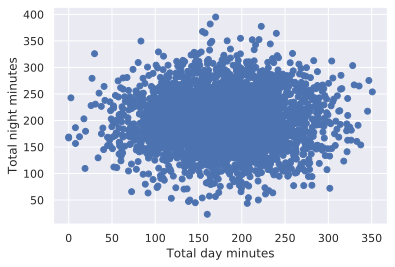

In [70]:
# Gráfica de dispersión: lo usamos para ver la correlación entre las variables.
x = 'Total day minutes'
y = 'Total night minutes'
plt.xlabel(x)
plt.ylabel(y)
plt.scatter(df[x], df[y])

# Vemos que no existe una relación clara entre las personas que hablan mucho de día y las que hablan mucho de noche.

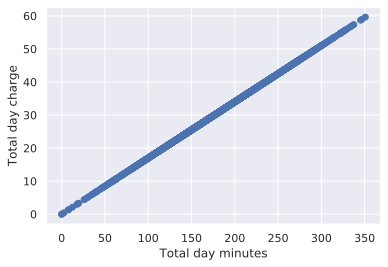

In [72]:
# Veamos si los minutos hablados en un día entero está correlacionado con el coste total diario.
plt.xlabel('Total day minutes')
plt.ylabel('Total day charge')
plt.scatter(df['Total day minutes'], df['Total day charge'])
# Como era obvio, están correlacionadas.

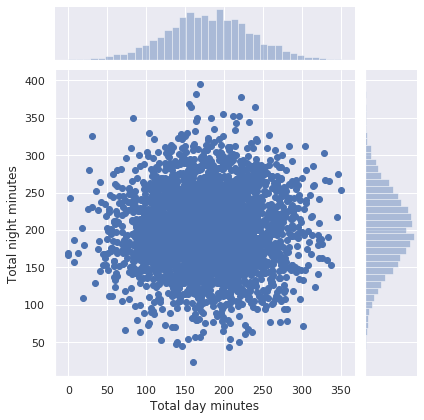

In [77]:
# Draw a plot of two variables with bivariate and univariate graphs.
sns.jointplot(x='Total day minutes', y='Total night minutes', data=df, kind='scatter');

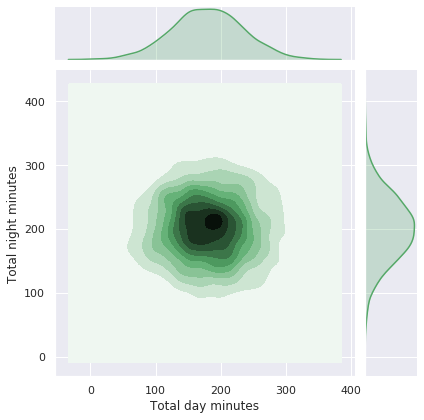

In [78]:
sns.jointplot('Total day minutes', 'Total night minutes', data=df, kind="kde", color="g");

In [76]:
# `pairplot()` may become very slow with the SVG format
%config InlineBackend.figure_format = 'png'
sns.pairplot(df[numerical + ['Churn']], vars = numerical, hue='Churn');

Output hidden; open in https://colab.research.google.com to view.

In [0]:
%config InlineBackend.figure_format = 'svg'

## 3.2 Cuantitativa vs Categórica (Quantitative vs. Categorical)

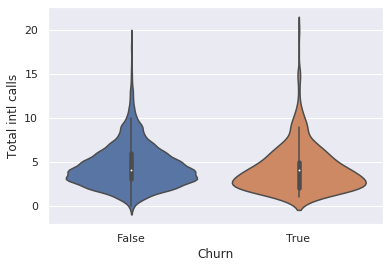

In [0]:
sns.violinplot(x="Churn", y="Total intl calls", data=df);

# Las personas que abandonan la compañia parece que realizan menos llamadas internacionales.

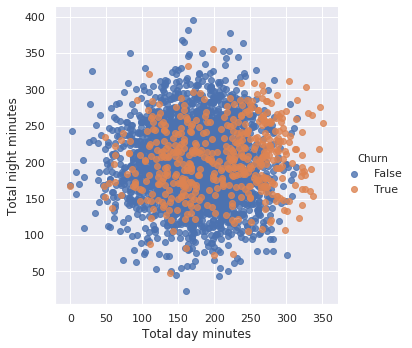

In [0]:
# Plot data and regression model fits across a FacetGrid
sns.lmplot('Total day minutes', 'Total night minutes', data=df, hue='Churn', fit_reg=False);

In [87]:
print(numerical)
# A veces podemos analizar una variable ordinal como numérica
numerical.append('Customer service calls')
print(numerical)

['Number vmail messages', 'Account length', 'Total day calls', 'Customer service calls', 'Total day minutes', 'Total night calls', 'Total intl minutes', 'Total night minutes', 'Total intl calls', 'Total eve minutes', 'Total eve calls']
['Number vmail messages', 'Account length', 'Total day calls', 'Customer service calls', 'Total day minutes', 'Total night calls', 'Total intl minutes', 'Total night minutes', 'Total intl calls', 'Total eve minutes', 'Total eve calls', 'Customer service calls']


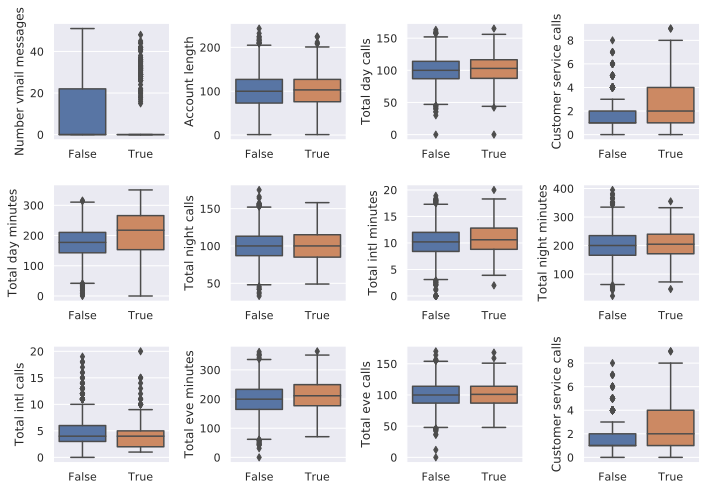

In [89]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(10, 7))
for idx, feat in enumerate(numerical):
    ax = axes[int(idx / 4), idx % 4]
    sns.boxplot(x='Churn', y=feat, data=df, ax=ax)
    ax.set_xlabel('')
    ax.set_ylabel(feat)
fig.tight_layout();

# Parece que las llamadas al servicio al cliente tienen que ver con el nº de churns positivos (gráfica [1,4]).
# También se aprecia un mayor numeros de churns positivos en aquellos que llaman mas al día (gráfica [2,1])

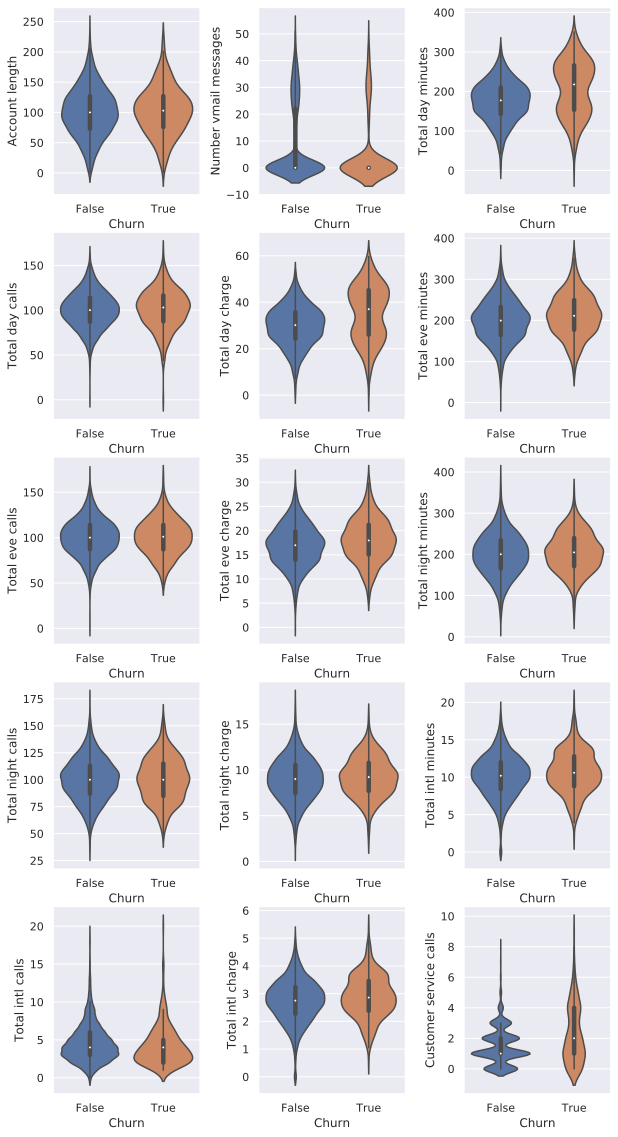

In [90]:
var_quant = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=[10, 20])
plt.subplots_adjust(wspace=0.4)
for i in range(1, len(var_quant)+1):
    plt.subplot(5, 3, i)
    sns.violinplot(x="Churn", y=var_quant[i-1], data=df);

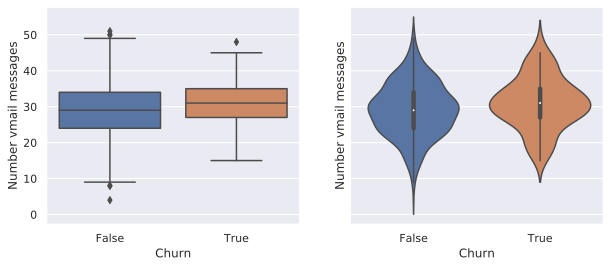

In [91]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 4))

sns.boxplot(x='Churn', y='Number vmail messages', 
            data=df[df['Number vmail messages'] > 0], 
            ax=axes[0]);

sns.violinplot(x='Churn', y='Number vmail messages', 
               data=df[df['Number vmail messages'] > 0], 
               ax=axes[1]);

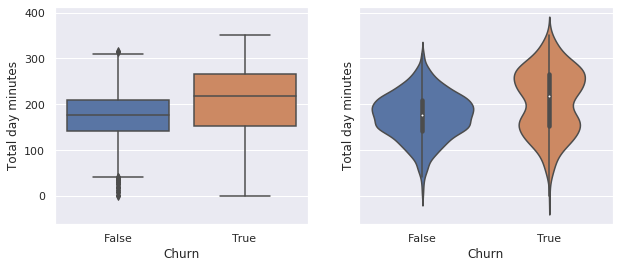

In [0]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 4))

sns.boxplot(x='Churn', y='Total day minutes', data=df, ax=axes[0]);
sns.violinplot(x='Churn', y='Total day minutes', data=df, ax=axes[1]);

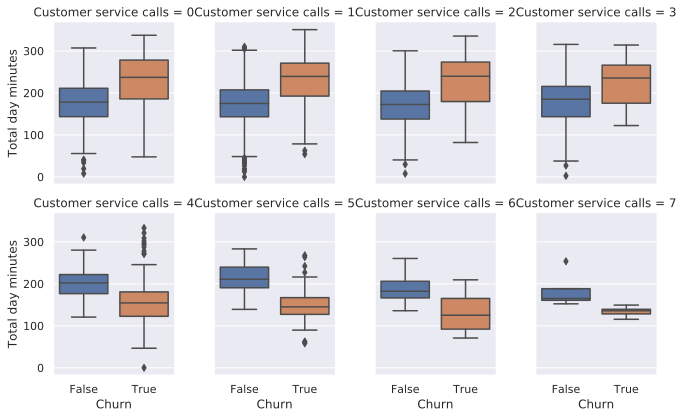

In [95]:
# Figure-level interface for drawing categorical plots onto a FacetGrid.
sns.catplot(x='Churn', y='Total day minutes', col='Customer service calls',
               data=df[df['Customer service calls'] < 8], kind="box",
               col_wrap=4, height=3, aspect=.8);
# Relacionamos los minutos hablados al día por cada persona con el churn y el nº de llamadas a atención al cliente.
# Parece que abandonar la compañia está relacionado con el nº de llamadas a atención al cliente, sobre todo entre 0 y 3 llamadas.

## 3.3 Categorical vs. Categorical

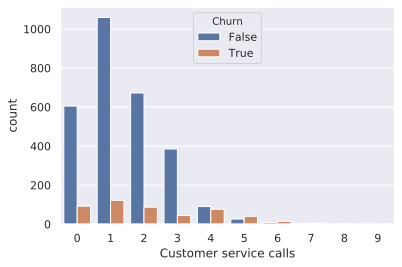

In [96]:
sns.countplot(x='Customer service calls', hue='Churn', data=df);

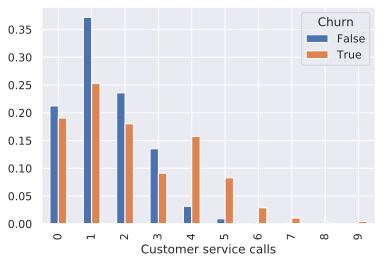

In [97]:
g = df.groupby('Churn')['Customer service calls'].value_counts(normalize=True).unstack().transpose().plot.bar()
# La suma de los porcentajes de cada color es igual al 100%
# Normalizamos todos los valores para verlo en contexto.

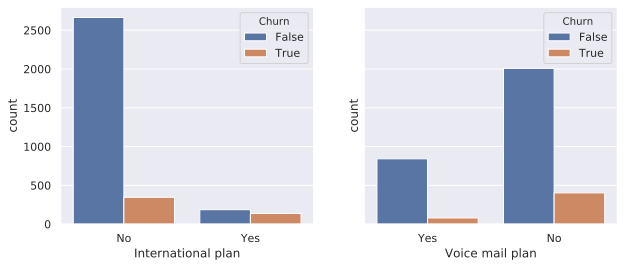

In [98]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 4))

sns.countplot(x='International plan', hue='Churn', data=df, ax=axes[0]);
sns.countplot(x='Voice mail plan', hue='Churn', data=df, ax=axes[1]);

# Los clientes que tienen plan internacional se van en la misma proporción de los que se quedan!.

In [105]:
# Frecuencia del churn por estado, puede aportar información interesante como por ejemplo muchos churns en un estado concreto.
pd.crosstab(df['State'], df['Churn']).T

State,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,HI,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,MT,NC,ND,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,RI,SC,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
Churn,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
False,49,72,44,60,25,57,62,49,52,55,46,50,41,64,53,62,57,51,47,54,53,49,57,69,56,51,54,57,56,56,47,50,56,52,68,68,52,67,37,59,46,52,48,54,62,72,65,52,71,96,68
True,3,8,11,4,9,9,12,5,9,8,8,3,3,9,5,9,13,8,4,11,17,13,16,15,7,14,14,11,6,5,9,18,6,14,15,10,9,11,8,6,14,8,5,18,10,5,8,14,7,10,9


In [103]:
df.groupby(['State'])['Churn'].agg([np.mean]).sort_values(by='mean', ascending=False).T

State,NJ,CA,TX,MD,SC,MI,MS,NV,WA,ME,MT,AR,KS,NY,MN,PA,MA,CT,NC,NH,GA,DE,OK,OR,UT,CO,KY,SD,OH,FL,IN,ID,WY,MO,VT,AL,NM,ND,WV,TN,DC,RI,WI,IL,NE,LA,IA,VA,AZ,AK,HI
mean,0.264706,0.264706,0.25,0.242857,0.233333,0.219178,0.215385,0.212121,0.212121,0.209677,0.205882,0.2,0.185714,0.180723,0.178571,0.177778,0.169231,0.162162,0.161765,0.160714,0.148148,0.147541,0.147541,0.141026,0.138889,0.136364,0.135593,0.133333,0.128205,0.126984,0.126761,0.123288,0.116883,0.111111,0.109589,0.1,0.096774,0.096774,0.09434,0.09434,0.092593,0.092308,0.089744,0.086207,0.081967,0.078431,0.068182,0.064935,0.0625,0.057692,0.056604


## 4. Whole dataset visualizations
## 4.1 Dimensionality reduction example


https://plot.ly/python/3d-scatter-plots/

## 4.2 Dimensionality reduction: Principal Component Analysis (PCA)

In [0]:
from sklearn.preprocessing import StandardScaler

# Separating out the features
x = df.loc[:, numerical].values

# Separating out the target
y = df.loc[:,['Churn']].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

In [0]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents, 
                           columns = ['Principal component 1', 'Principal component 2'])

finalDf = pd.concat([principalDf, df[['Churn']]], axis = 1)

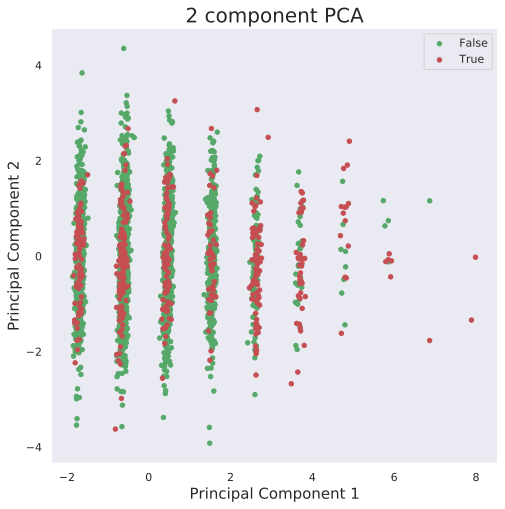

In [109]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [False, True]
colors = ['g', 'r']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Churn'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'Principal component 1']
               , finalDf.loc[indicesToKeep, 'Principal component 2']
               , c = color
               , s = 20)
ax.legend(targets)
ax.grid()

## 4.3 t-SNE

In [0]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [0]:
X = df.drop(['Churn', 'State'], axis=1) #quitamos el churn y el estado
X['International plan'] = X['International plan'].map({'Yes': 1, 'No': 0})
X['Voice mail plan'] = X['Voice mail plan'].map({'Yes': 1, 'No': 0})

In [0]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [0]:
%%time
tsne = TSNE(random_state=17)
tsne_repr = tsne.fit_transform(X_scaled)

CPU times: user 51.1 s, sys: 126 ms, total: 51.3 s
Wall time: 26.1 s


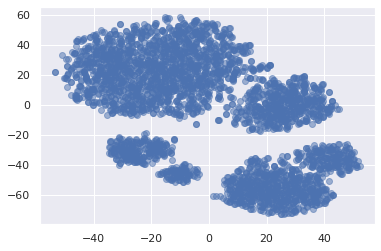

In [0]:
plt.scatter(tsne_repr[:, 0], tsne_repr[:, 1], alpha=.5);

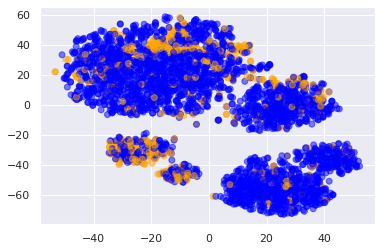

In [0]:
plt.scatter(tsne_repr[:, 0], tsne_repr[:, 1],
            c=df['Churn'].map({False: 'blue', True: 'orange'}), alpha=.5);

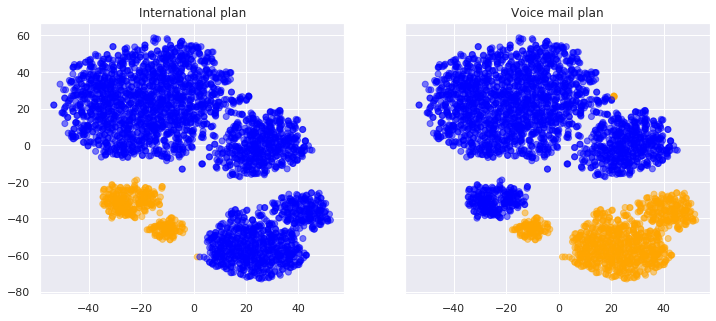

In [0]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(12, 5))

for i, name in enumerate(['International plan', 'Voice mail plan']):
    axes[i].scatter(tsne_repr[:, 0], tsne_repr[:, 1], 
                    c=df[name].map({'Yes': 'orange', 'No': 'blue'}), alpha=.5);
    axes[i].set_title(name);

## 5. Specific techniques: Survival plots

In [0]:
# Ejecutar si da fallo en Colab
!pip install lifelines

     |████████████████████████████████| 419kB 5.0MB/s 


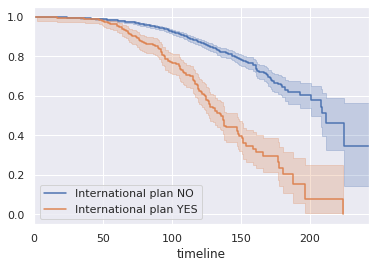

In [0]:
from lifelines import KaplanMeierFitter

kmf1 = KaplanMeierFitter() ## instantiate the class to create an object

## fit the model for 1st cohort
kmf1.fit(df['Account length'][df['International plan'] == 'No'], 
         df['Churn'][df['International plan'] == 'No'], 
         label='International plan NO')

a1 = kmf1.plot()

## fit the model for 2nd cohort
kmf1.fit(df['Account length'][df['International plan'] == 'Yes'], 
         df['Churn'][df['International plan'] == 'Yes'], 
         label='International plan YES')

g = kmf1.plot(ax=a1)

## 6. Useful resources
- The same notebook as an interactive web-based [Kaggle Kernel](https://www.kaggle.com/kashnitsky/topic-2-visual-data-analysis-in-python)
- ["Plotly for interactive plots"](https://nbviewer.jupyter.org/github/Yorko/mlcourse.ai/blob/master/jupyter_english/tutorials/plotly_tutorial_for_interactive_plots_sankovalev.ipynb) - a tutorial by Alexander Kovalev within mlcourse.ai (full list of tutorials is [here](https://mlcourse.ai/tutorials))
- ["Bring your plots to life with Matplotlib animations"](https://nbviewer.jupyter.org/github/Yorko/mlcourse.ai/blob/master/jupyter_english/tutorials/bring_your_plots_to_life_with_matplotlib_animations_kyriacos_kyriacou.ipynb) - a tutorial by Kyriacos Kyriacou within mlcourse.ai
- ["Some details on Matplotlib"](https://nbviewer.jupyter.org/github/Yorko/mlcourse.ai/blob/master/jupyter_english/tutorials/some_details_in_matplotlib_pisarev_ivan.ipynb) - a tutorial by Ivan Pisarev within mlcourse.ai
- Main course [site](https://mlcourse.ai), [course repo](https://github.com/Yorko/mlcourse.ai), and YouTube [channel](https://www.youtube.com/watch?v=QKTuw4PNOsU&list=PLVlY_7IJCMJeRfZ68eVfEcu-UcN9BbwiX)
- Medium ["story"](https://medium.com/open-machine-learning-course/open-machine-learning-course-topic-2-visual-data-analysis-in-python-846b989675cd) based on this notebook
- Course materials as a [Kaggle Dataset](https://www.kaggle.com/kashnitsky/mlcourse)
- If you read Russian: an [article](https://habrahabr.ru/company/ods/blog/323210/) on Habrahabr with ~ the same material. And a [lecture](https://youtu.be/vm63p8Od0bM) on YouTube
- Here is the official documentation for the libraries we used: [`matplotlib`](https://matplotlib.org/contents.html), [`seaborn`](https://seaborn.pydata.org/introduction.html) and [`pandas`](https://pandas.pydata.org/pandas-docs/stable/).
- The [gallery](http://seaborn.pydata.org/examples/index.html) of sample charts created with `seaborn` is a very good resource.
- Also, see the [documentation](http://scikit-learn.org/stable/modules/manifold.html) on Manifold Learning in `scikit-learn`.
- Efficient t-SNE implementation [Multicore-TSNE](https://github.com/DmitryUlyanov/Multicore-TSNE).
- "How to Use t-SNE Effectively", [Distill.pub](https://distill.pub/2016/misread-tsne/).